# ✅ **What is Class Imbalance?**

>**In classification problems, sometimes one class has many more samples compared to the other.**

Example: Disease detection dataset

- **Non-disease (0)** = 95%

- **Disease (1)** = 5% ✅ Minority class 
  <br>This creates **bias** → Model learns to predict majority always → high accuracy but poor recall for minority.

👉 Goal: **Improve minority class learning**
(Metrics like Recall, F1-Score, ROC-AUC become important)

# ✅ **Solutions to Class Imbalance**

There are 3 categories:

| Category            | Method                                                              | Meaning               |
| ------------------- | ------------------------------------------------------------------- | --------------------- |
| **Resampling**      | Random Under Sampling (RUS), Random Over Sampling (ROS), SMOTE etc. | Modify data           |
| **Algorithm level** | Class-weight adjustment                                             | Modify model training |
| **Hybrid**          | Combine sampling + class-weight                                     |                       |


# 🎯 **Random Under Sampling (RUS)**

### **✅ Definition**
> **Reduce number of samples from majority class randomly.**

🧠 Idea: Balance dataset by removing majority samples

#### **✅ When to use?**
- When dataset is large
- When majority class clearly dominates
- When minority class has good representation of patterns

#### **❌ Drawbacks**
- Loss of information (important data may be deleted)
- Model might underperform

# **🎯 Random Over Sampling (ROS)**

### **✅ Definition**

> **Increase number of samples of the minority class by duplicating them randomly.**

🧠 Idea: Balance dataset by adding copies of minority

#### ✅ When to use?

✅ When dataset is small<br>
✅ Minority class has too few examples

#### ❌ Drawbacks

- Overfitting risk increases

- Minority samples are exact duplicates, not new patterns

# **⚖️ To Balance the Dataset we need  `imbalanced-lean` Library**

In [262]:
# first lets create an imbalanced dataset 

from sklearn.datasets import make_classification
import pandas as pd
# from collection import Counter

In [263]:
# creating imbalanced dataset

x,y = make_classification(
    n_samples=1000,
    n_features = 10,
    n_classes = 2,
    weights = [0.90, 0.10],
    random_state = 42,
    )
x = pd.DataFrame(data = x, columns= [f"feature_{i}" for i in range(10)])
y = pd.DataFrame(data = y , columns = ["Class_Labels"])

print(f"Original class distribution:\n{y.value_counts()}")

Original class distribution:
Class_Labels
0               897
1               103
Name: count, dtype: int64


### 🌟 NOTE For Above code:

> **The `weights` parameter defines what fraction of samples belong to each class in your synthetic dataset.**

##### means:

- **Class 0 → 90% of samples**

- **Class 1 → 10% of samples**

In [264]:
data = pd.concat([x,y],axis = 1)


In [265]:
data.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,Class_Labels
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.379471,-0.015168,0.451605,-0.027417,-0.036508,0.029886,-0.829391,-0.082698,-0.039581,0.025112,0.103000
std,0.725037,1.001338,0.641999,0.994598,1.037675,0.986939,1.055819,1.048987,1.216485,1.002531,0.304111
min,-3.281236,-3.221016,-2.787107,-2.991136,-3.007632,-2.832156,-4.543441,-3.688365,-3.080534,-3.019512,0.000000
25%,-0.075460,-0.699467,0.142302,-0.695500,-0.721686,-0.623122,-1.385456,-0.796008,-1.018350,-0.660088,0.000000
50%,0.322610,-0.028277,0.429447,-0.012086,-0.055906,0.034297,-0.941701,-0.076948,-0.428024,0.017219,0.000000
75%,0.810116,0.691488,0.754751,0.672219,0.644151,0.667746,-0.436216,0.603682,0.976274,0.693013,0.000000
max,2.872178,3.098299,2.817960,3.109919,3.152057,3.117681,3.757504,3.926238,3.994644,3.243093,1.000000


## 1️⃣ **Random Under Sampling Code**

In [266]:
from imblearn.under_sampling import RandomUnderSampler

In [267]:
rus = RandomUnderSampler(random_state = 42)

In [268]:
x_rus, y_rus = rus.fit_resample(x, y)

In [269]:
print("After Rus:", y_rus.value_counts())

After Rus: Class_Labels
0               103
1               103
Name: count, dtype: int64


In [271]:
y = y.to_numpy().flatten()
y_rus = y_rus.to_numpy().flatten()

## 🔢 **Compare Performance by training model before and after resampling**

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [273]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [274]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [275]:
y_pred = model.predict(x_test)
print(f"Before Sampling: \n{classification_report(y_test, y_pred)}")

Before Sampling: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       175
           1       0.67      0.48      0.56        25

    accuracy                           0.91       200
   macro avg       0.80      0.72      0.75       200
weighted avg       0.90      0.91      0.90       200



In [276]:
x_rus_train, x_rus_test, y_rus_train, y_rus_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 42)

In [277]:
model.fit(x_rus_train, y_rus_train)
y_pred_rus = model.predict(x_rus_test)

print(f'After RUS: \n{classification_report(y_rus_test, y_pred_rus)}')

After RUS: 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.80      0.91      0.85        22

    accuracy                           0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42



## 2️⃣ **Random Over Sampling Code**

In [278]:
from imblearn.over_sampling import RandomOverSampler

In [279]:
ros = RandomOverSampler(random_state = 42)


In [280]:
x_ros, y_ros = ros.fit_resample(x,y)

In [281]:
from collections import Counter

In [282]:
print(f"After ROS: {Counter(y_ros)} ")

After ROS: Counter({np.int64(0): 897, np.int64(1): 897}) 


In [283]:
x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 42)

In [284]:
model.fit(x_ros_train, y_ros_train)

LogisticRegression()

In [285]:
y_ros_pred = model.predict(x_ros_test)

In [286]:
print(f"After ROS: {classification_report(y_ros_test, y_ros_pred)}")

After ROS:               precision    recall  f1-score   support

           0       0.88      0.91      0.89       180
           1       0.90      0.87      0.89       179

    accuracy                           0.89       359
   macro avg       0.89      0.89      0.89       359
weighted avg       0.89      0.89      0.89       359



## 📊 **Visualization of Sampling**

In [287]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After ROS')

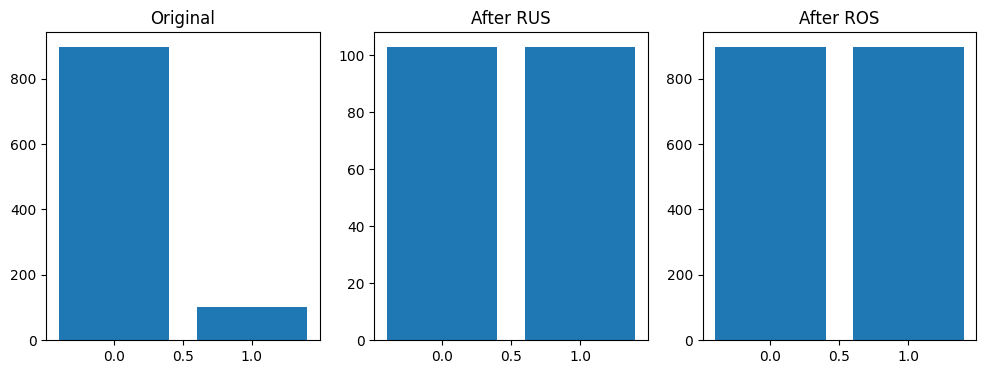

In [288]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))

axes[0].bar(Counter(y).keys(), Counter(y).values())
axes[0].set_title("Original")

axes[1].bar(Counter(y_rus).keys(), Counter(y_rus).values())
axes[1].set_title("After RUS")

axes[2].bar(Counter(y_ros).keys(), Counter(y_ros).values())
axes[2].set_title("After ROS")